In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
import kagglehub

path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1


In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1/CC GENERAL.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Exploration

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


# Data Processing

### Handling Missing values

Credit Limit

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

<ipython-input-34-20ba581df680>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)


Minimum Payments

Correlations with MINIMUM_PAYMENTS:
MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398684
CASH_ADVANCE                        0.140107
BALANCE_FREQUENCY                   0.132569
INSTALLMENTS_PURCHASES              0.132172
CREDIT_LIMIT                        0.126686
PAYMENTS                            0.126651
CASH_ADVANCE_TRX                    0.109739
CASH_ADVANCE_FREQUENCY              0.098838
PURCHASES_TRX                       0.096333
PURCHASES                           0.093860
TENURE                              0.059444
ONEOFF_PURCHASES                    0.048755
PURCHASES_INSTALLMENTS_FREQUENCY    0.030073
PURCHASES_FREQUENCY                 0.003030
ONEOFF_PURCHASES_FREQUENCY         -0.030327
PRC_FULL_PAYMENT                   -0.140379
Name: MINIMUM_PAYMENTS, dtype: float64


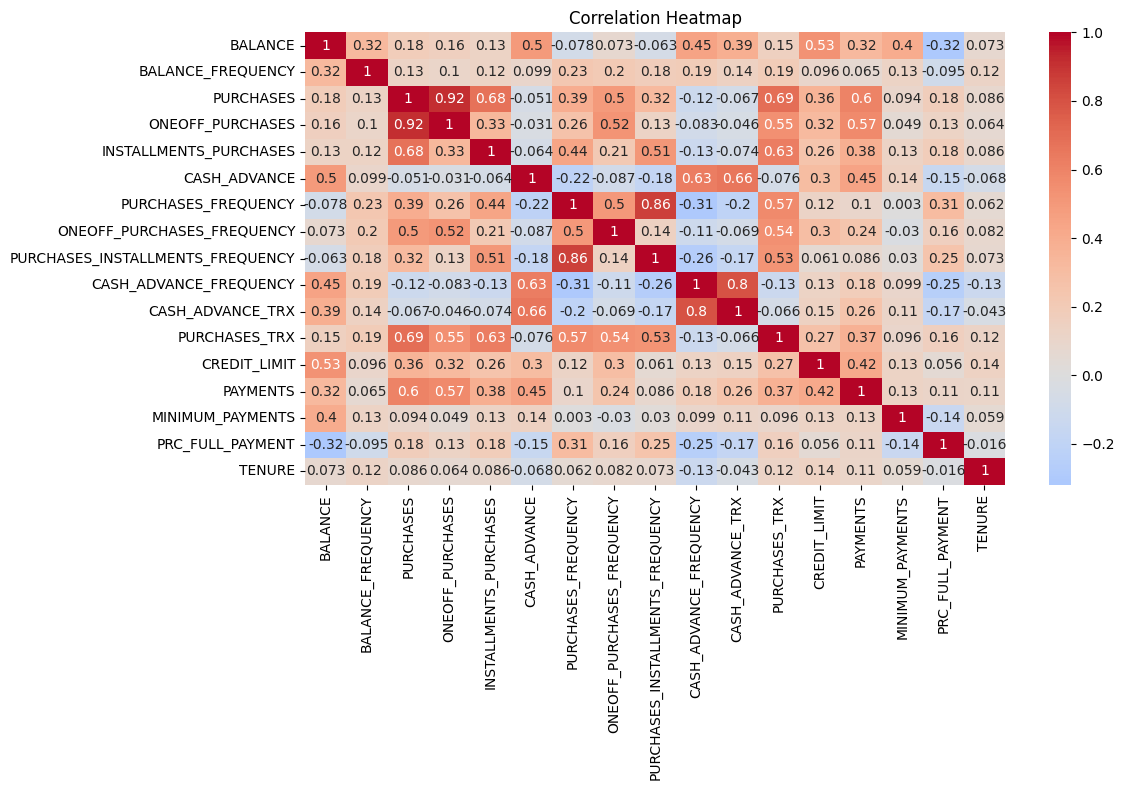

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlations = numeric_df.corr()['MINIMUM_PAYMENTS'].sort_values(ascending=False)
print("Correlations with MINIMUM_PAYMENTS:")
print(correlations)


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
features_for_imputation = [
    'MINIMUM_PAYMENTS',
    'BALANCE',
    'PRC_FULL_PAYMENT',
    'CASH_ADVANCE',
    'BALANCE_FREQUENCY',
    'INSTALLMENTS_PURCHASES',
    'CREDIT_LIMIT',
    'PAYMENTS'
]

df_subset = df[features_for_imputation].copy()

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_subset)

df['MINIMUM_PAYMENTS'] = imputed_data[:, features_for_imputation.index('MINIMUM_PAYMENTS')]

In [ ]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


### Outlier Detection

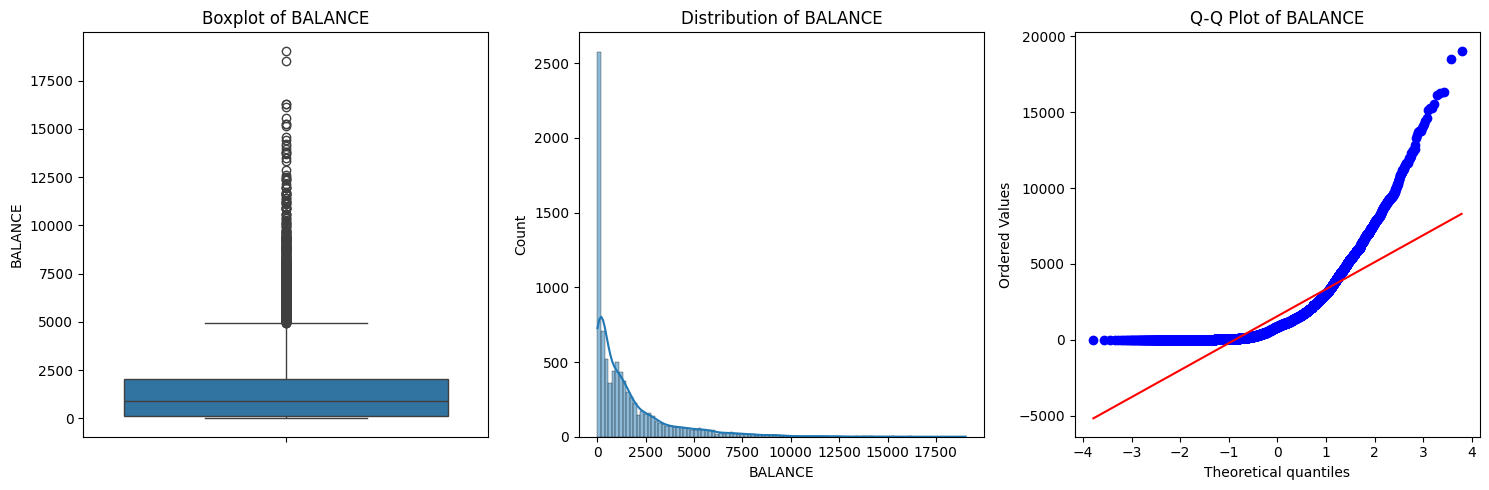

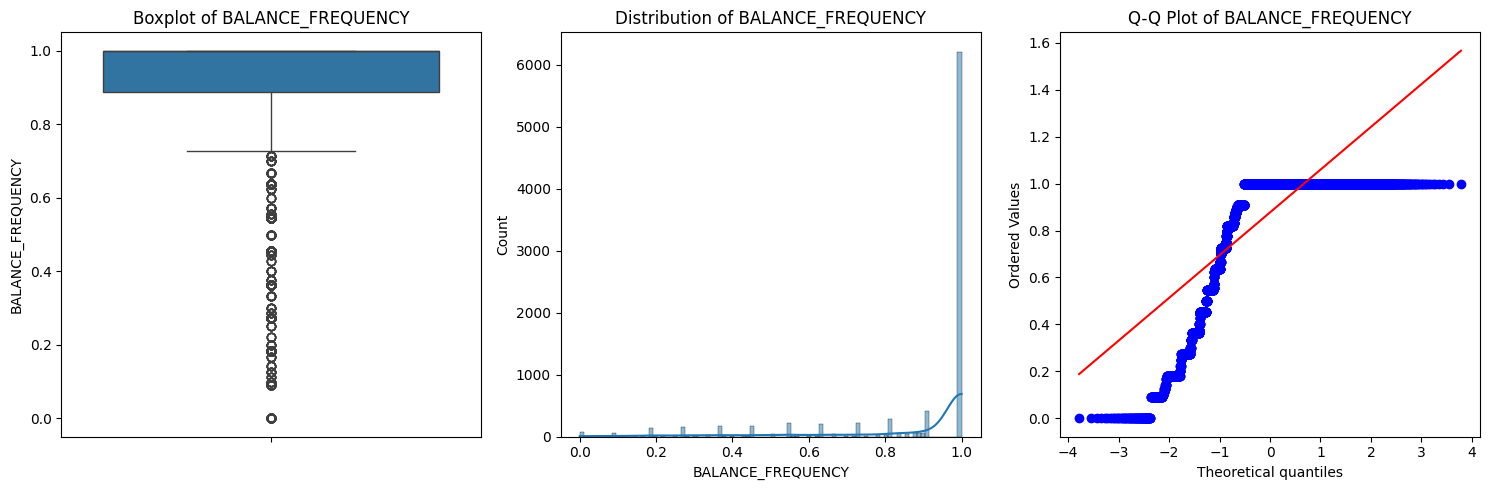

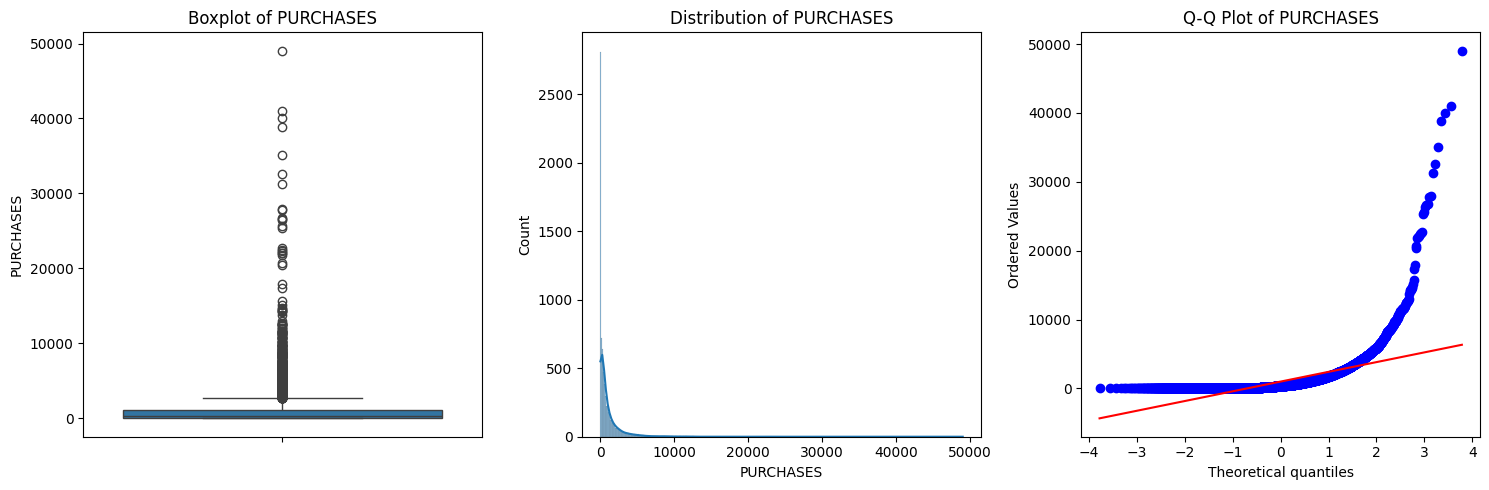

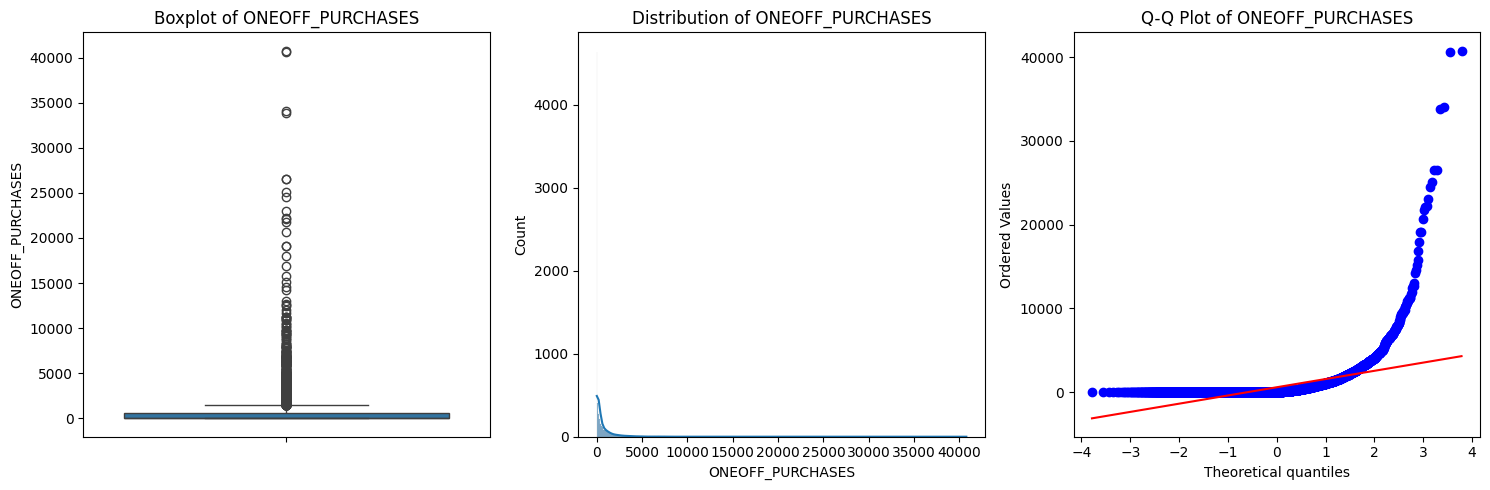

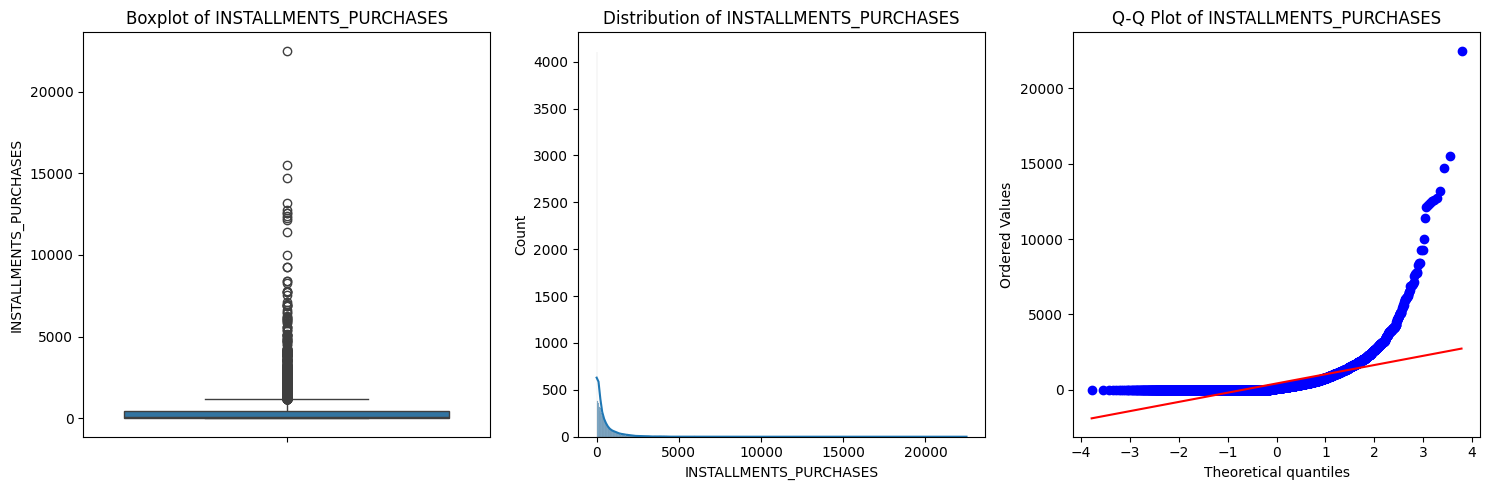

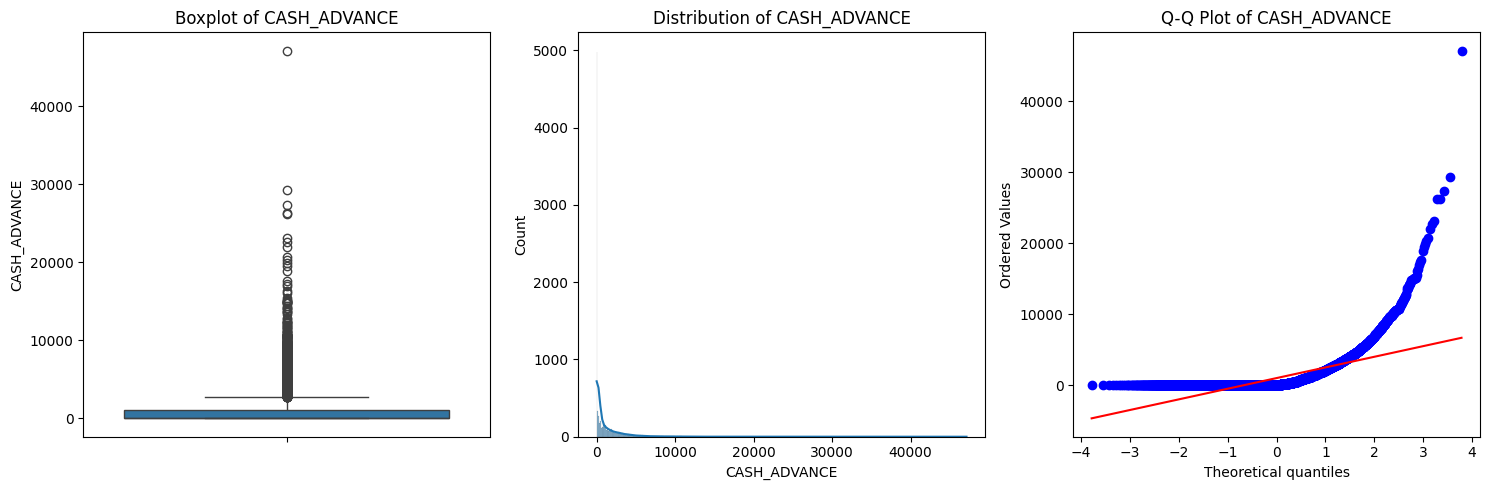

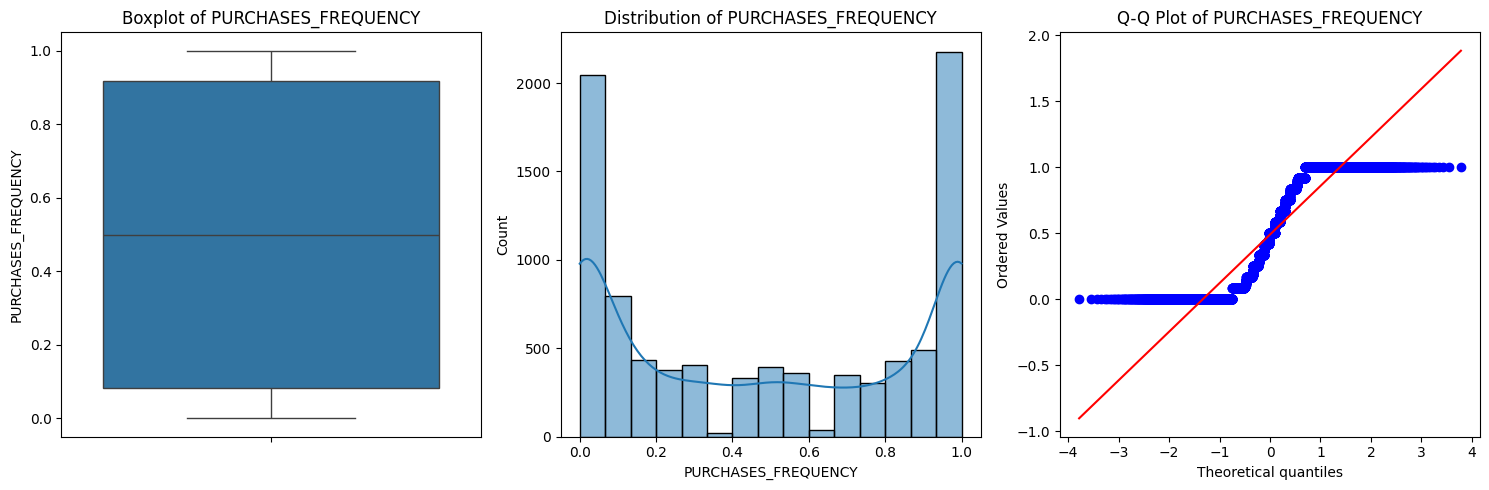

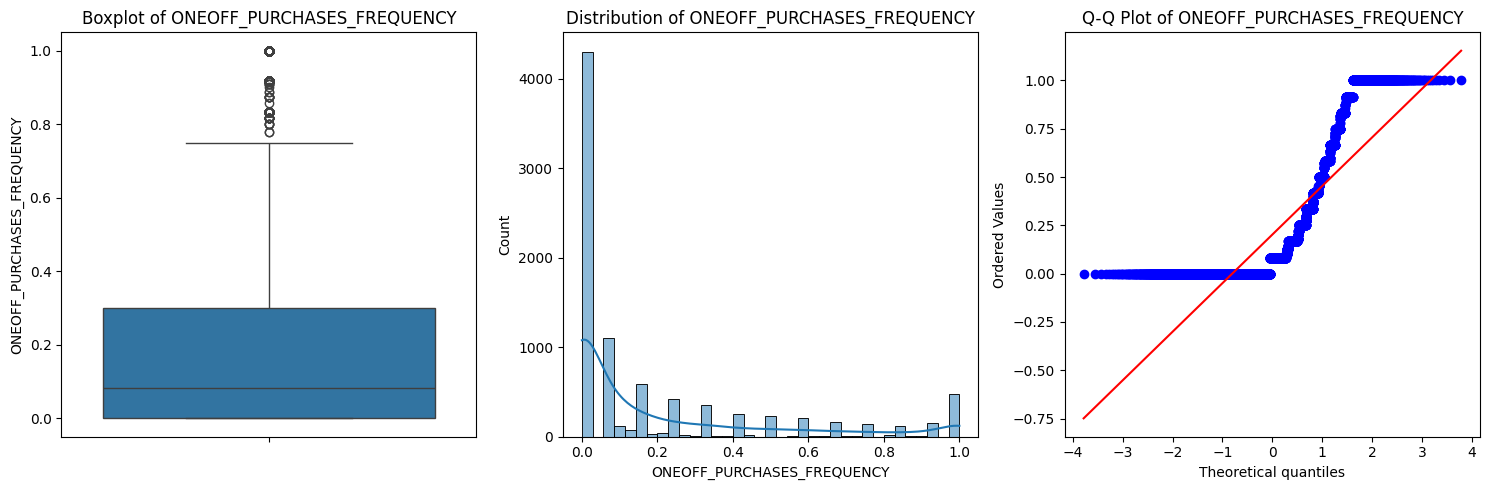

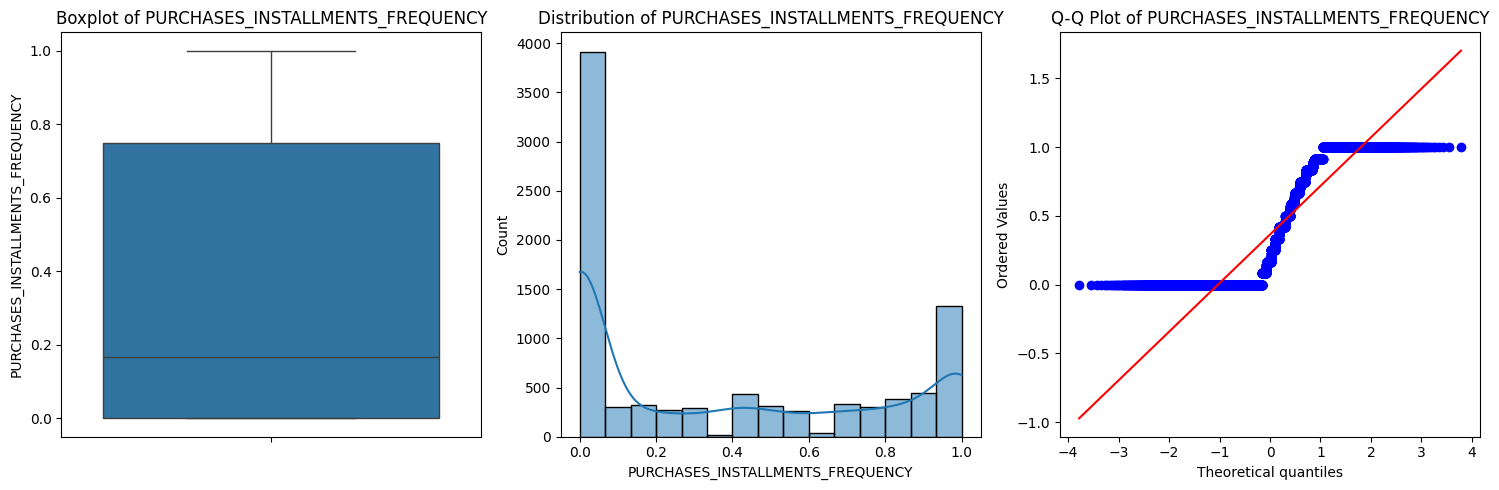

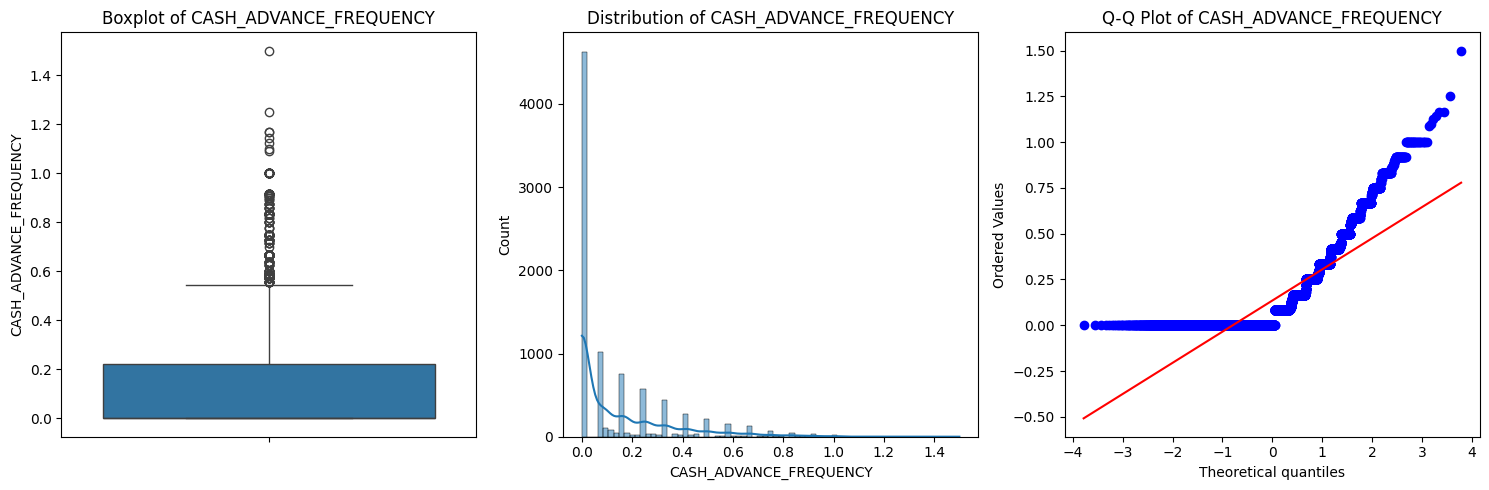

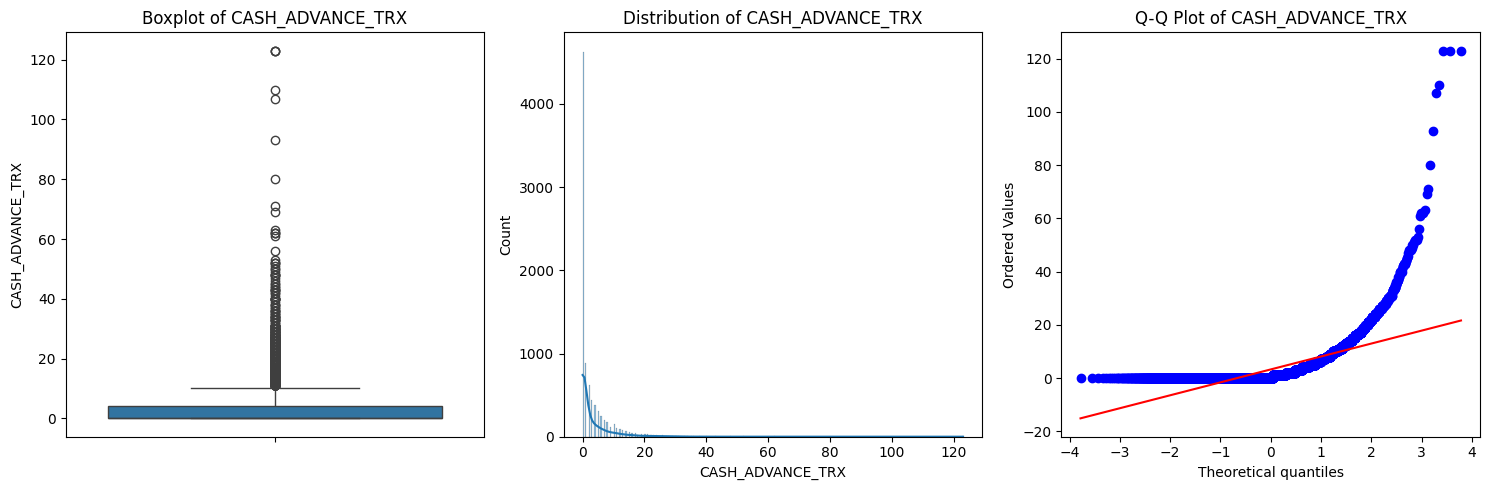

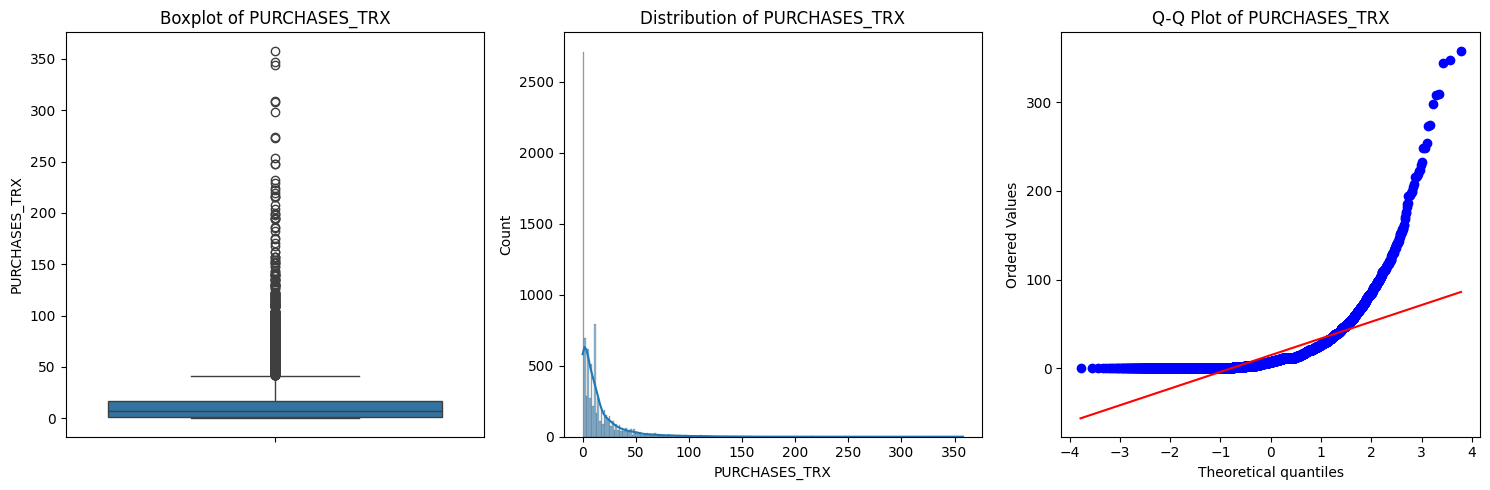

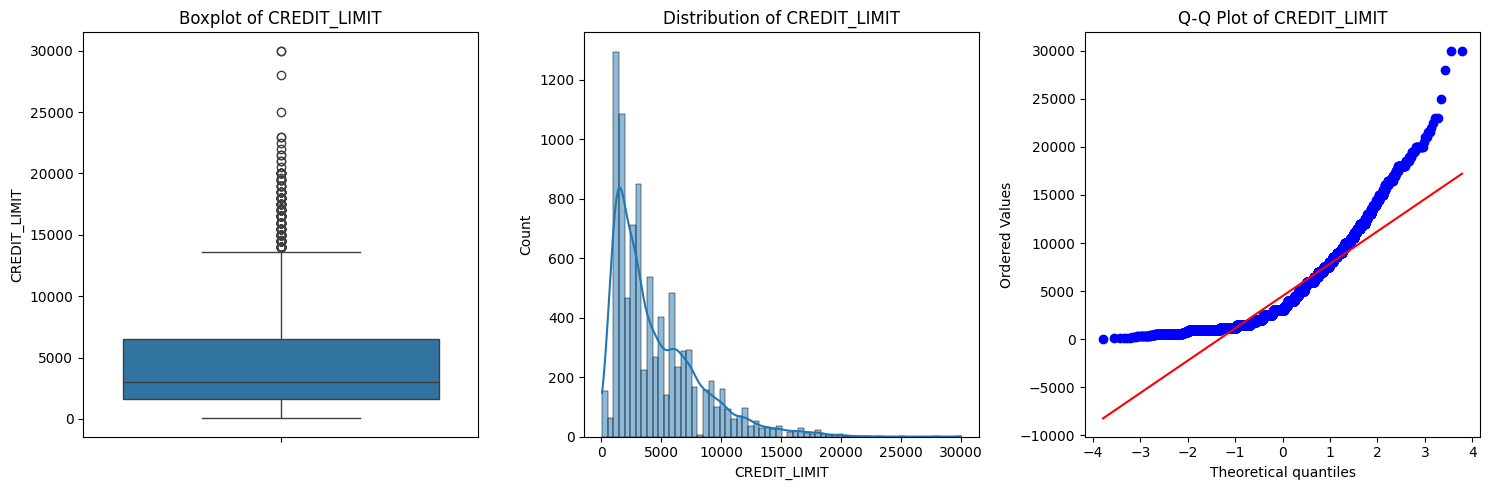

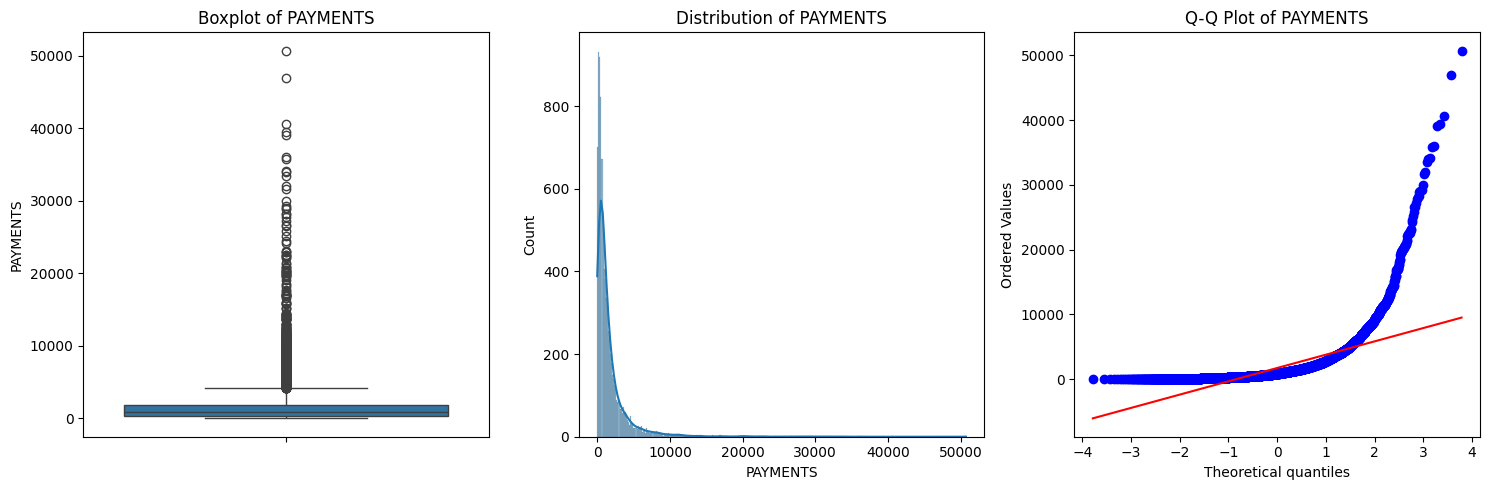

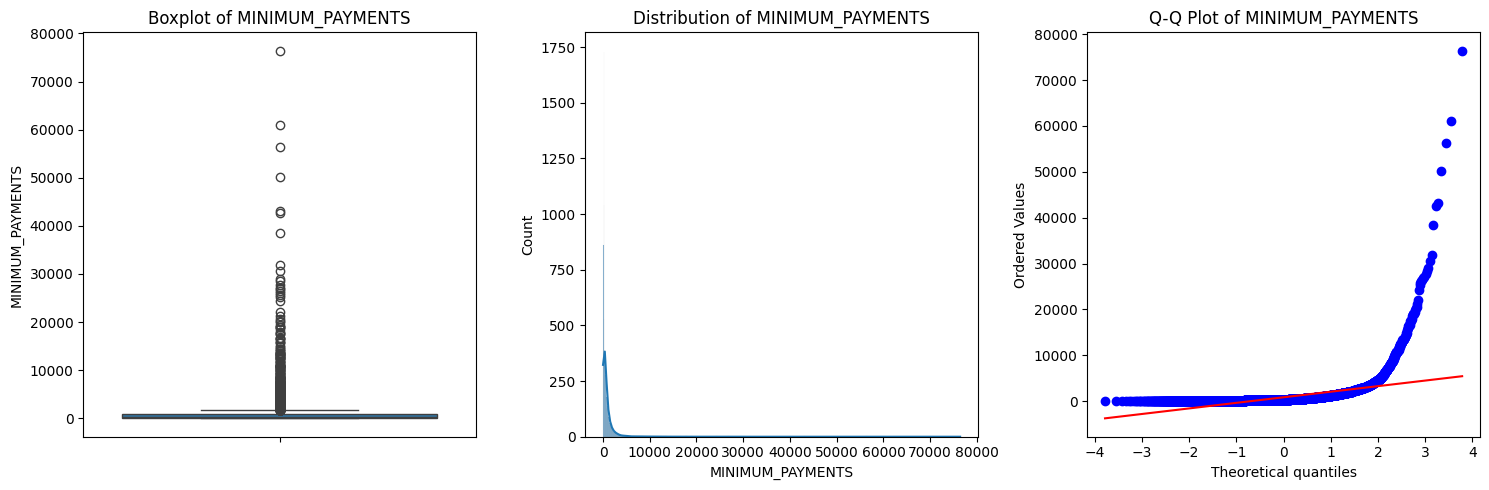

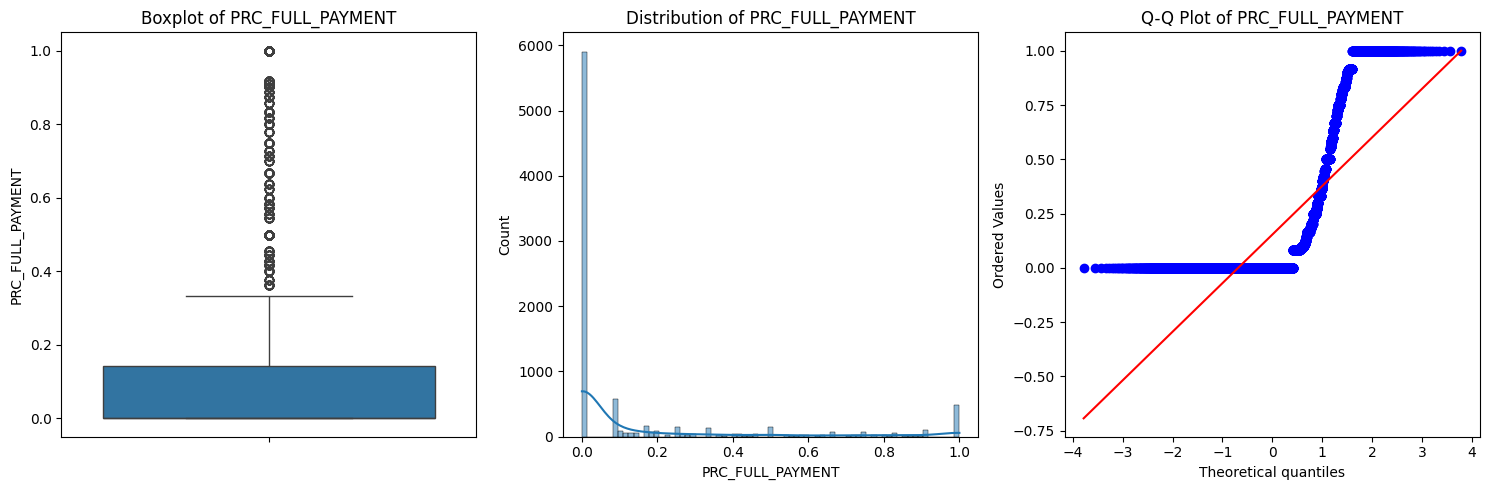

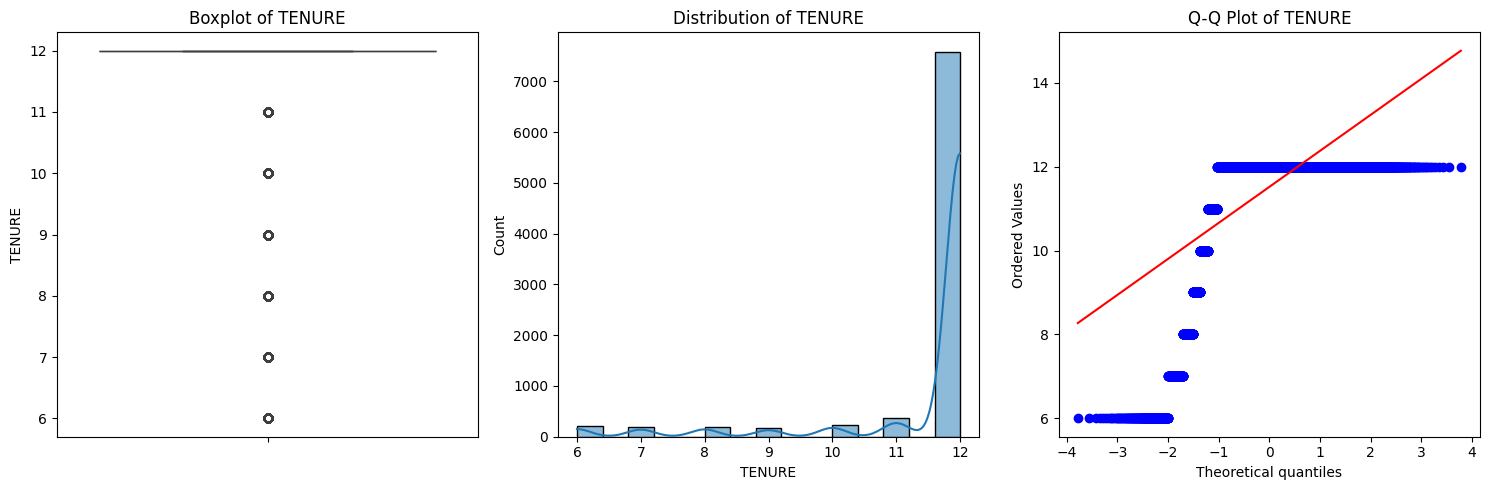

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create visualization for each feature
def plot_feature_distribution(df, feature):
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Boxplot of {feature}')

    plt.subplot(132)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')

    plt.subplot(133)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')

    plt.tight_layout()
    plt.show()

# Plot distributions for each feature
for column in numeric_columns:
    plot_feature_distribution(df, column)

In [ ]:
def handle_outliers(df, columns, method='iqr', threshold=3):
    df_clean = df.copy()

    for column in columns:
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_clean[column] = df_clean[column].clip(lower=lower_bound, upper=upper_bound)

    return df_clean

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

df_clean = handle_outliers(df, numeric_columns, method='iqr')

In [ ]:
df_clean.shape

(8950, 18)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_data = scaler.fit_transform(df_clean[numeric_columns])

df_normalized = pd.DataFrame(normalized_data, columns=numeric_columns)

df_normalized["CUST_ID"] = df_clean["CUST_ID"]


In [ ]:
df_normalized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID
0,-0.877821,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010503,-0.899859,-0.769860,-0.629277,0.0,C10001
1,1.178546,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762757,2.165375,0.934238,0.973961,0.0,C10002
2,0.718487,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910528,-0.569653,0.121209,-0.629277,0.0,C10003
3,0.179623,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910528,-1.058417,-0.320729,-0.629277,0.0,C10004
4,-0.372561,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951394,-0.525443,-0.577532,-0.629277,0.0,C10005


In [ ]:
numeric_df = df_normalized.select_dtypes(include=['float64', 'int64'])





In [ ]:
df_normal = numeric_df

In [ ]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(numeric_df)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

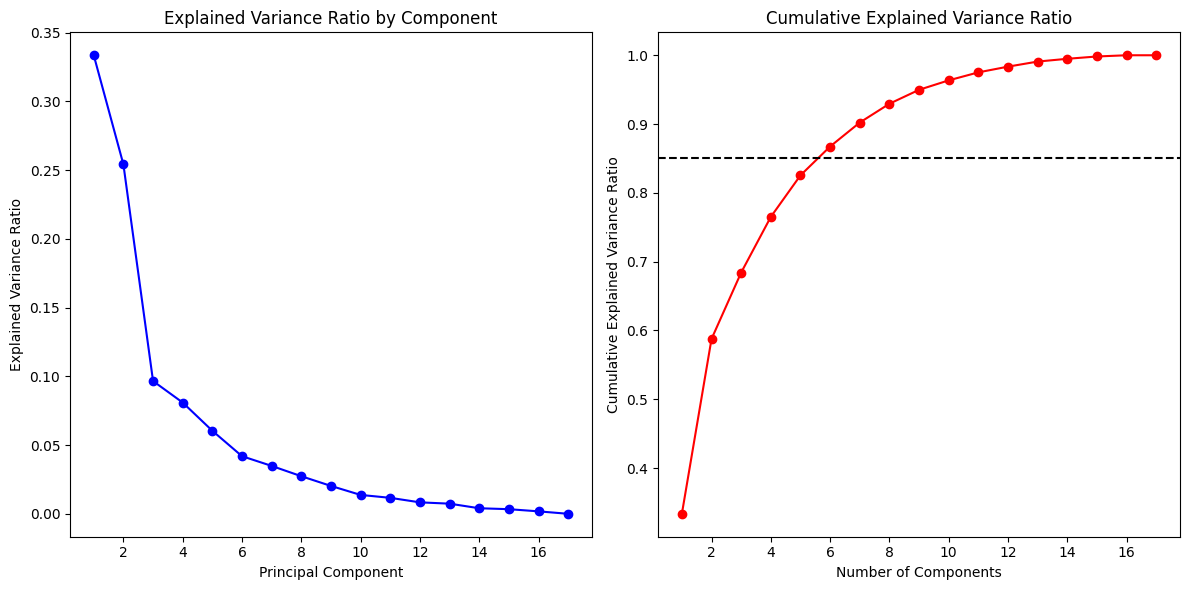

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Explained Variance Ratio by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.axhline(y=0.85, color='k', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [ ]:
pca_final = PCA(n_components=6)
pca_reduced = pca_final.fit_transform(numeric_df)

Now we have two preprocessed datasets
1. df_normal
2. pda_reduced


# Clustering

### KMeans

In [ ]:
def plot_elbow_method(data, name, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.title(f'Elbow Method - {name}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()
    return inertias

Elbow curve for original data:


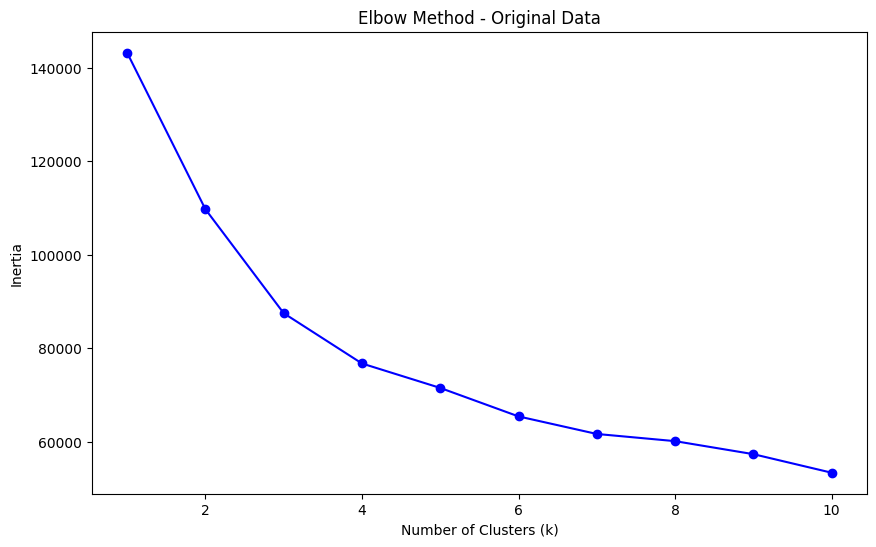

In [ ]:
print("Elbow curve for original data:")
original_inertias = plot_elbow_method(df_normal, "Original Data")


Elbow curve for PCA-reduced data:


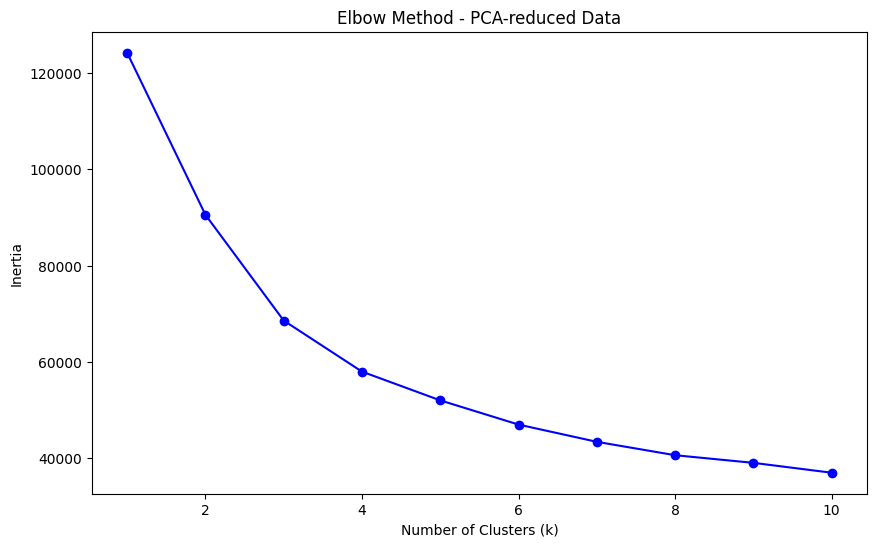

In [ ]:
print("\nElbow curve for PCA-reduced data:")
pca_inertias = plot_elbow_method(pca_reduced, "PCA-reduced Data")

From the elbow method, optimal number of clusters will be either 3 or 4 but we'll be going with 3

In [ ]:
# Apply K-means clustering
kmeans_normal = KMeans(n_clusters=3, random_state=42)
kmeans_pca = KMeans(n_clusters=3, random_state=42)

# Fit and get labels
kmeans_normal_labels = kmeans_normal.fit_predict(df_normal)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_reduced)

### Dendrogram

In [ ]:
def plot_dendrogram(data, title):
    plt.figure(figsize=(10, 7))
    linkage_matrix = linkage(data, method='ward')
    dendrogram(linkage_matrix)
    plt.title(f'Hierarchical Clustering Dendrogram - {title}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.axhline(y=150, color='r', linestyle='--')
    plt.show()
    return linkage_matrix

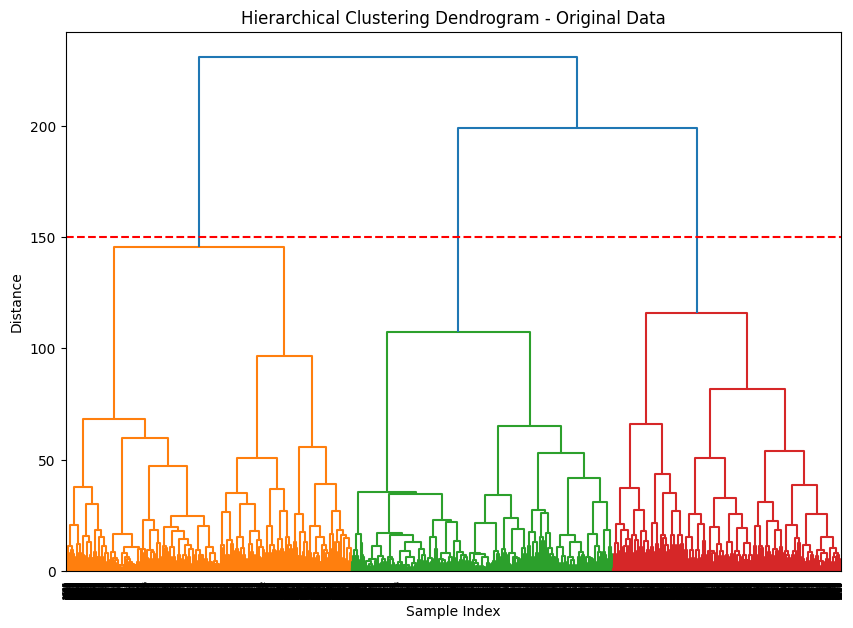

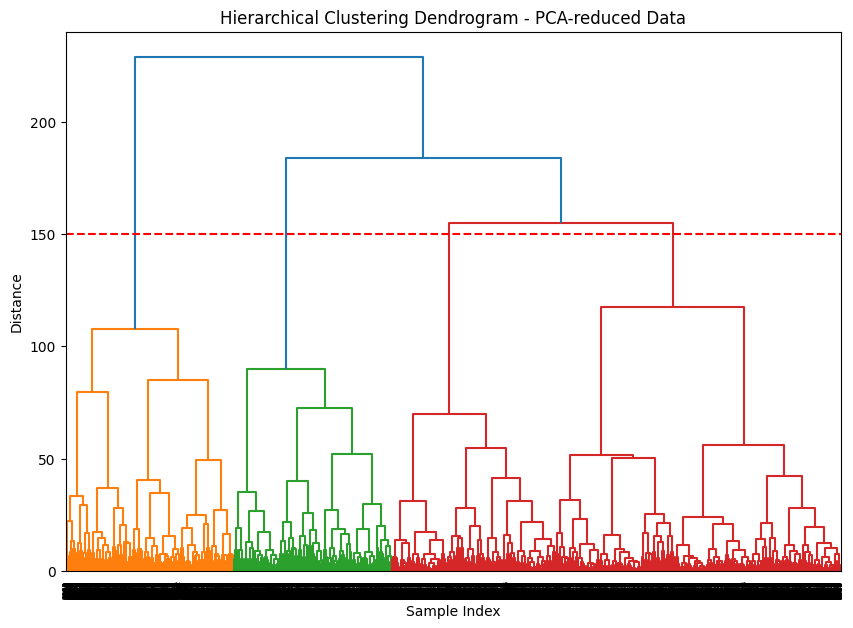

In [ ]:
# Plot dendrograms
linkage_original = plot_dendrogram(df_normal, "Original Data")
linkage_pca = plot_dendrogram(pca_reduced, "PCA-reduced Data")

From the dendrogram visuals, using the top blue grids, we can conveniently pick 3 as our optimum number of clusters

In [ ]:
hierarchical_normal = AgglomerativeClustering(n_clusters=3)
hierarchical_pca = AgglomerativeClustering(n_clusters=3)

hierarchical_normal_labels = hierarchical_normal.fit_predict(numeric_df)
hierarchical_pca_labels = hierarchical_pca.fit_predict(pca_reduced)

### Spectral

In [ ]:
spectral_normal = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors')
spectral_pca = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors')

spectral_normal_labels = spectral_normal.fit_predict(numeric_df)
spectral_pca_labels = spectral_pca.fit_predict(pca_reduced)

#### Visualize Clusters for PCA data in 2d

In [ ]:
def plot_clusters_2d(data, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(label='Cluster')
    plt.show()

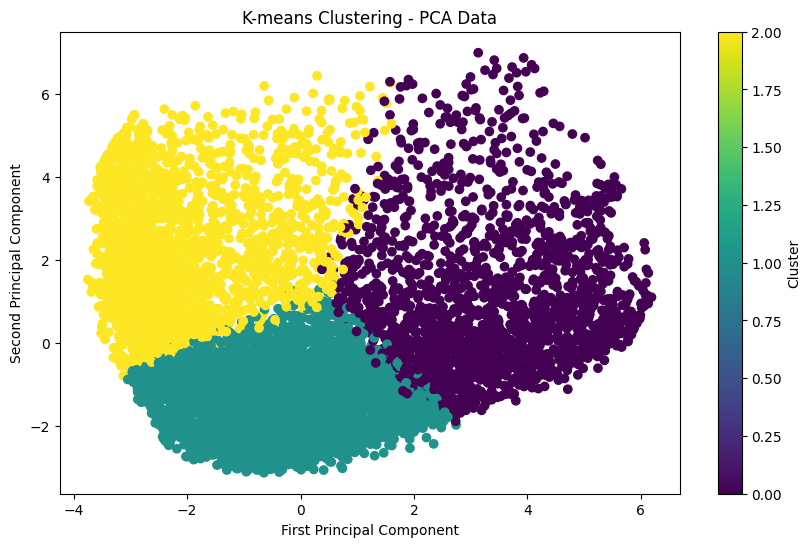

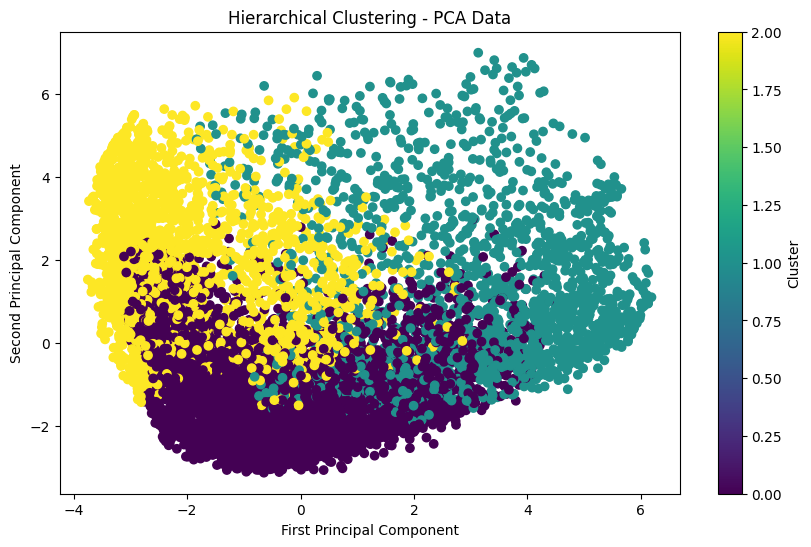

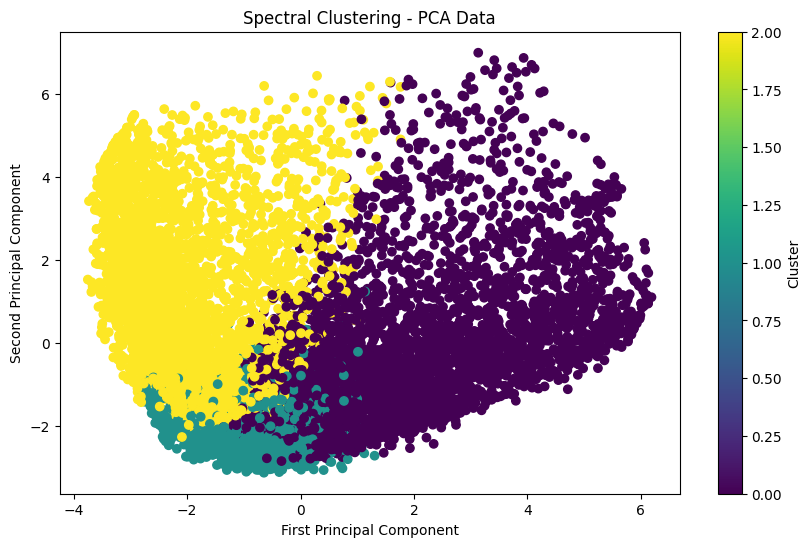

In [ ]:
plot_clusters_2d(pca_reduced, kmeans_pca_labels, 'K-means Clustering - PCA Data')
plot_clusters_2d(pca_reduced, hierarchical_pca_labels, 'Hierarchical Clustering - PCA Data')
plot_clusters_2d(pca_reduced, spectral_pca_labels, 'Spectral Clustering - PCA Data')

### Model Evaluation

In [ ]:
def dunn_index(X, labels):
    """Calculate Dunn Index for clustering evaluation"""
    from scipy.spatial.distance import pdist, squareform
    import numpy as np

    distances = squareform(pdist(X))

    n_clusters = len(np.unique(labels))
    intra_cluster_distances = []
    inter_cluster_distances = []

    for i in range(n_clusters):
        cluster_points = np.where(labels == i)[0]
        if len(cluster_points) > 1:
            cluster_distances = distances[np.ix_(cluster_points, cluster_points)]
            intra_cluster_distances.append(np.max(cluster_distances))

    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = np.where(labels == i)[0]
            cluster_j = np.where(labels == j)[0]
            cluster_distances = distances[np.ix_(cluster_i, cluster_j)]
            inter_cluster_distances.append(np.min(cluster_distances))

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Calculate Dunn Index for all methods on both original and PCA data
results = {
    'Original Data': {
        'K-means': dunn_index(numeric_df, kmeans_normal_labels),
        'Hierarchical': dunn_index(numeric_df, hierarchical_normal_labels),
        'Spectral': dunn_index(numeric_df, spectral_normal_labels)
    },
    'PCA Data': {
        'K-means': dunn_index(pca_reduced, kmeans_pca_labels),
        'Hierarchical': dunn_index(pca_reduced, hierarchical_pca_labels),
        'Spectral': dunn_index(pca_reduced, spectral_pca_labels)
    }
}

# Print results
print("\nDunn Index Results:")
print("-" * 50)
print(f"{'Method':<15} {'Normal Data':<15} {'PCA Data':<15}")
print("-" * 50)
for method in ['K-means', 'Hierarchical', 'Spectral']:
    print(f"{method:<15} {results['Original Data'][method]:<15.4f} {results['PCA Data'][method]:<15.4f}")
print("-" * 50)



Dunn Index Results:
--------------------------------------------------
Method          Normal Data     PCA Data       
--------------------------------------------------
K-means         0.0132          0.0095         
Hierarchical    0.0392          0.0167         
Spectral        0.0293          0.0131         
--------------------------------------------------


In [ ]:
# Print cluster sizes for comparison
print("\nCluster sizes For PCA:")
print("\nK-means:")
print(pd.Series(kmeans_pca_labels).value_counts().sort_index())
print("\nHierarchical:")
print(pd.Series(hierarchical_pca_labels).value_counts().sort_index())
print("\nSpectral:")
print(pd.Series(spectral_pca_labels).value_counts().sort_index())


Cluster sizes For PCA:

K-means:
0    2038
1    4594
2    2318
Name: count, dtype: int64

Hierarchical:
0    5180
1    1945
2    1825
Name: count, dtype: int64

Spectral:
0    3964
1    1435
2    3551
Name: count, dtype: int64


In [ ]:
# Print cluster sizes for comparison
print("\nCluster sizes For Normal:")
print("\nK-means:")
print(pd.Series(kmeans_normal_labels).value_counts().sort_index())
print("\nHierarchical:")
print(pd.Series(hierarchical_normal_labels).value_counts().sort_index())
print("\nSpectral:")
print(pd.Series(spectral_normal_labels).value_counts().sort_index())


Cluster sizes For Normal:

K-means:
0    2043
1    4589
2    2318
Name: count, dtype: int64

Hierarchical:
0    3307
1    2624
2    3019
Name: count, dtype: int64

Spectral:
0    1625
1    3426
2    3899
Name: count, dtype: int64


### Analysis and Justification

#### Dunn Index Comparison:


Hierarchical clustering on original data shows the highest Dunn Index (0.0392)
Spectral clustering on original data comes second (0.0293)
All methods perform better on original data than PCA-reduced data



#### Method-specific Analysis:
a) Hierarchical Clustering (Original Data):


Highest Dunn Index (0.0392)
Most balanced cluster sizes
Best overall performance

b) Spectral Clustering (Original Data):

Second-best Dunn Index (0.0293)
Reasonable cluster distribution
Good compromise between separation and balance

c) K-means:

Lowest Dunn Index
Most imbalanced clusters
Similar performance on both original and PCA data


#### Cluster Size Distribution:


Hierarchical clustering on original data shows the most balanced cluster sizes (3307, 2624, 3019)


K-means shows significant imbalance in both cases with one very large cluster (~4500)


Spectral clustering shows moderate imbalance but better than K-means

#### Final Recommendation:
Hierarchical Clustering on the original data is the optimal choice because:

- Statistical Justification:


Highest Dunn Index (0.0392) indicating best cluster separation
Most evenly distributed cluster sizes
Better preservation of data relationships


- Practical Advantages:


Works better with original features (more interpretable)
Natural cluster formation through hierarchical structure
More stable cluster assignments



The performance degradation in PCA-reduced data suggests that the dimensionality reduction might be losing important information for clustering.